<div class="alert alert-block alert-warning">
Planning - <font color='red'><b>Acquisition</b></font> - Preparation - Exploratory Analysis - Modeling - Product Delivery
</div>

# Acquisition Exercises
The end product of these exercise is a jupyter notebook (classification_exercises.ipynb) and a acquire.py file. The notebook will contain all your work as you move through the exercises. The acquire.py file should contain the final functions that acquire the data into a pandas dataframe.

### 1. Make a new repo called ```classification-exercises``` on both GitHub and within your ```codeup-data-science``` directory. This will be where you do your work for this module.

### 2. Inside of your local ```classification-exercises``` repo, create a file named ```.gitignore``` with the following contents:

```
env.py
.DS_Store
.ipynb_checkpoints/
__pycache__
*.csv
```

Add and commit your ```.gitignore``` file before moving forward.

### 3. Now that you are 100% sure that your ```.gitignore``` file lists ```env.py```, create or copy your ```env.py``` file inside of ```classification-exercises```. Running ```git status``` should show that git is ignoring this file.

### 4. In a jupyter notebook, ```classification_exercises.ipynb```, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, ```df_iris```, from this data.

In [1]:
import pandas as pd
import numpy as np
import os
from pydataset import data
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from env import get_db_url
import QMCBT_acquire as acquire
import QMCBT_prepare as prepare
import QMCBT_explore as explore

# import splitting functions
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")

alpha = 0.05
α = 0.05

# data('mpg', show_doc=True) # view the documentation for the dataset

**CUSTOM EXPLORATION FUNCTIONS
nunique_column_all(df): PRINT NUNIQUE OF ALL COLUMNS
nunique_column_objects(df): PRINT NUNIQUE OF COLUMNS THAT ARE OBJECTS
nunique_column_qty(df): PRINT NUNIQUE OF COLUMNS THAT ARE *NOT* OBJECTS
numeric_range(df): COMPUTE RANGE FOR ALL NUMERIC VARIABLES

**USEFUL EXPLORATORY CODE**
DFNAME.head()
DFNAME.shape
DFNAME.shape[0] #read row count
DFNAME.describe().T
DFNAME.columns.to_list()
DFNAME.COLUMNNAME.value_counts(dropna=False)
DFNAME.dtypes
DFNAME.select_dtypes(include='object').columns
DFNAME.select_dtypes(include='float').columns
pd.crosstab(DFNAME.COLUMN-1, DFNAME.COLUMN-2)


### 4.1 print the first 3 rows

In [2]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### 4.2 print the number of rows and columns (shape)

In [3]:
df_iris.shape

(150, 5)

### 4.3 print the column names

In [4]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

### 4.4 print the data type of each column

In [5]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

### 4.5 print the summary statistics for each of the numeric variables

In [6]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 5. Read the data from this google sheet (https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) into a dataframe, ```df_google```.

In [7]:
# Had to follow link then copy address to get 'edit#gid' for my formula as opposed to 'edit?' in the link
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [8]:
df_google = pd.read_csv(csv_export_url)

### 5.1 print the first 3 rows

In [9]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 5.2 print the number of rows and columns

In [10]:
df_google.shape

(891, 12)

### 5.3 print the column names

In [11]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### 5.4 print the data type of each column

In [12]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 5.5 print the summary statistics for each of the numeric variables

In [13]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### 5.6 print the unique values for each of your categorical variables

In [14]:
for col in df_google.columns:
#     print(col)
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [15]:
def nunique_column_objects(df):
    print("empty")
nunique_column_objects(df_google)

empty


In [16]:
explore.nunique_column_objects(df_google)

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [17]:
df_google.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
for col in df_google.columns:
#     print(col)
    if df_google[col].dtypes != 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

PassengerId has 891 unique values.
Survived has 2 unique values.
Pclass has 3 unique values.
Age has 88 unique values.
SibSp has 7 unique values.
Parch has 7 unique values.
Fare has 248 unique values.


In [19]:
def nunique_column_qty(df):
    print("empty")
nunique_column_qty(df_google)

empty


In [20]:
explore.nunique_column_qty(df_google)

PassengerId has 891 unique values.
Survived has 2 unique values.
Pclass has 3 unique values.
Age has 88 unique values.
SibSp has 7 unique values.
Parch has 7 unique values.
Fare has 248 unique values.


In [21]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [22]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
df_google.SibSp.value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
df_google.Parch.value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named ```df_excel```.

In [25]:
df_excel = pd.read_excel('train.xlsx', sheet_name='train')

In [26]:
df_excel.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,NaN,S


In [27]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


### 6.1 assign the first 100 rows to a new dataframe, ```df_excel_sample```

In [28]:
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

(100, 12)

### 6.2 print the number of rows of your original dataframe

In [29]:
df_excel.shape[0]

891

### 6.3 print the first 5 column names

In [30]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

### 6.4 print the column names that have a data type of ```object```

In [31]:
df_excel.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [32]:
df_excel.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 6.5 compute the range for each of the numeric variables.

In [33]:
def numeric_range(df):
    numeric_list = df.select_dtypes(include = 'float').columns.tolist()
    numeric_range = df[numeric_list].describe().T
    numeric_range['range'] = numeric_range['max'] - numeric_range['min']
    return numeric_range

In [34]:
numeric_range(df_excel)

,count,mean,std,min,25%,50%,75%,max,range
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000,890.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,2.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


In [35]:
def numeric_range(df):
    print("empty")
numeric_range(df_excel)

empty


In [36]:
explore.numeric_range(df_excel)

,count,mean,std,min,25%,50%,75%,max,range
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000,890.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,2.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


<div class="alert alert-block alert-warning">
Planning - <font color='red'><b>Acquisition</b></font> - Preparation - Exploratory Analysis - Modeling - Product Delivery
</div>

## Make a new python module, ```acquire.py``` to hold the following data aquisition functions:

### 1. Make a function named ```get_titanic_data``` that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the ```Codeup Data Science Database```.

In [37]:
def new_titanic_data():
    '''
    This function reads the titanic data from the Codeup database into a DataFrame.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup database.
    df = pd.read_sql(sql_query, get_db_url('titanic_db'))
    
    return df

In [38]:
def get_titanic_data():
    '''
    This function reads in titanic data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a DataFrame.
    '''
    if os.path.isfile('titanic_df.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('titanic_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_titanic_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('titanic_df.csv')
        
    return df

In [39]:
titanic_df = get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### 2. Make a function named ```get_iris_data``` that returns the data from the ```iris_db``` on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the ```species_ids```. Obtain your data from the ```Codeup Data Science Database```.

In [40]:
def new_iris_sql_df():
    '''
    This function reads the iris data from the Codeup database into a DataFrame.
    '''
    # Create SQL query.
    sql_query = 'SELECT species_id, species_name, sepal_length, sepal_width, petal_length, petal_width FROM measurements JOIN species USING(species_id)'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('iris_db'))
    
    return df

In [41]:
def get_iris_sql_df():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a DataFrame.
    '''
    if os.path.isfile('iris_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    return df

In [42]:
iris_df = get_iris_sql_df()
print(iris_df.shape)
iris_df.head()

(150, 6)


,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [43]:
def new_iris_sns_df():
    '''
    This function reads the iris data from the seaborn database into a DataFrame.
    '''
    import seaborn as sns
    
    # Read in DataFrame from pydata db.
    df = sns.load_dataset('iris')
    
    return df

In [44]:
def get_iris_sns_df():
    '''
    This function reads in iris data from seaborn database, writes data to
    a csv file if a local file does not exist, and returns a DataFrame.
    '''
    if os.path.isfile('iris_sns_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_sns_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_sns_df()
        
        # Cache data
        df.to_csv('iris_sns_df.csv')
        
    return df

In [45]:
iris_sns_df = get_iris_sns_df()
print(iris_sns_df.shape)
iris_sns_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 3. Make a function named ```get_telco_data``` that returns the data from the ```telco_churn``` database in SQL. In your SQL, be sure to join ```contract_types```, ```internet_service_types```, ```payment_types``` tables with the ```customers``` table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the ```Codeup Data Science Database```.

In [46]:
def new_telco_churn_df():
    '''
    This function reads the telco_churn (NOT telco_normalized) data from the Codeup database into a DataFrame.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM customers LEFT JOIN internet_service_types USING (internet_service_type_id) LEFT JOIN contract_types USING (contract_type_id) LEFT JOIN payment_types USING (payment_type_id);'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('telco_churn'))
    
    return df

In [47]:
def get_telco_churn_df():
    '''
    This function reads in telco_churn (NOT telco_normalized) data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a DataFrame.
    '''
    if os.path.isfile('telco_churn_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('telco_churn_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from telco db into a DataFrame
        df = new_telco_df()
        
        # Cache data
        df.to_csv('telco_churn_df.csv')
        
    return df

In [48]:
telco_churn_df = get_telco_churn_df()
print(telco_churn_df.shape)
telco_churn_df.head()

(7043, 24)


,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


### 4. Once you've got your ```get_titanic_data```, ```get_iris_data```, and ```get_telco_data``` functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of ```telco.csv```, ```titanic.csv```, or ```iris.csv```. If they exist, use the ```.csv``` file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a ```.csv``` file with the appropriate name.

#### **Make sure your env.py and csv files are not being pushed to GitHub!**

<div class="alert alert-block alert-warning">
Planning - Acquisition - <font color='red'><b>Preparation</b></font> - Exploratory Analysis - Modeling - Product Delivery
</div>

# Preparation Exercises
The end product of this exercise should be the specified functions in a python script named ```prepare.py```. Do these in your ```classification_exercises.ipynb``` first, then transfer to the ```prepare.py``` file.

This work should all be saved in your local ```classification-exercises``` repo. Then ```add```, ```commit```, and ```push``` your changes.

## Using the ```Iris``` Data:

### 1. Use the function defined in ```acquire.py``` to load the ```iris``` data.

In [49]:
def get_iris_sql_df():
    print("empty")
get_iris_sql_df()

empty


In [50]:
iris_df = acquire.get_iris_sql_df()
print(iris_df.shape)
iris_df.head()

(150, 6)


,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


### 2. Drop the ```species_id``` and ```measurement_id``` columns.

In [51]:
iris_df = iris_df.drop(columns='species_id')
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### 3. Rename the ```species_name``` column to just species.

In [52]:
iris_df = iris_df.rename(columns={'species_name': 'species'})
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### 4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [53]:
# drop_first=True drops the first bucket, then by default, if all other buckets are False, thyen first bucket is True
dummy_iris_df = pd.get_dummies(iris_df.species, drop_first=True)
dummy_iris_df.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [54]:
iris_df = pd.concat([iris_df, dummy_iris_df], axis=1)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


### 5. Create a function named ```prep_iris``` that accepts the untransformed ```iris``` data, and returns the data with the transformations above applied.

In [55]:
def prep_iris_df(iris_df):
    iris_df = iris_df.drop(columns='species_id')
    iris_df = iris_df.rename(columns={'species_name': 'species'})
    dummy_iris_df = pd.get_dummies(iris_df.species, drop_first=True)
    iris_df = pd.concat([iris_df, dummy_iris_df], axis=1)
    return iris_df

In [56]:
iris_df = acquire.get_iris_sql_df()
print(iris_df.shape)
iris_df.head()

(150, 6)


,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [57]:
prep_iris_df(iris_df)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


## Using the ```Titanic``` dataset:

### 1. Use the function defined in ```acquire.py``` to load the Titanic data.

In [58]:
titanic_df = acquire.get_titanic_df()
print(titanic_df.shape)
titanic_df.head()

(891, 13)


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [59]:
titanic_df.parch.value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [60]:
titanic_df.deck.value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

### 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [61]:
titanic_df = titanic_df.drop(columns=['passenger_id', 'class', 'deck'])
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Southampton,0
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,S,Southampton,1
3,1,1,female,35.0,1,0,53.1000,S,Southampton,0
4,0,3,male,35.0,0,0,8.0500,S,Southampton,1


### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [62]:
dummy_df = pd.get_dummies(data=titanic_df['sex'], drop_first=True)
dummy_df2 = pd.get_dummies(data=titanic_df['embark_town'], drop_first=False)
dummy_df.head(), dummy_df2.head()

(   male
 0     1
 1     0
 2     0
 3     0
 4     1,
    Cherbourg  Queenstown  Southampton
 0          0           0            1
 1          1           0            0
 2          0           0            1
 3          0           0            1
 4          0           0            1)

In [63]:
titanic = pd.concat([titanic_df, dummy_df, dummy_df2], axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,male,Cherbourg,Queenstown,Southampton
0,0,3,male,22.0,1,0,7.2500,S,Southampton,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Southampton,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,Southampton,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Southampton,1,1,0,0,1


### 4. Create a function named ```prep_titanic``` that accepts the raw titanic data, and returns the data with the transformations above applied.

In [64]:
titanic_df = acquire.get_titanic_df()
print(titanic_df.shape)
titanic_df.head()

(891, 13)


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [65]:
def prep_titanic_df(titanic_df):
    titanic_df = titanic_df.drop(columns=['passenger_id', 'class', 'deck'])
    dummy_df = pd.get_dummies(data=titanic_df['sex'], drop_first=True)
    dummy_df2 = pd.get_dummies(data=titanic_df['embark_town'], drop_first=False)
    titanic_df = pd.concat([titanic_df, dummy_df, dummy_df2], axis=1)
    return titanic_df

In [66]:
prep_titanic_df(titanic_df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,male,Cherbourg,Queenstown,Southampton
0,0,3,male,22.0,1,0,7.2500,S,Southampton,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Southampton,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,Southampton,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Southampton,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Southampton,1,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,Southampton,1,0,0,0,1
888,0,3,female,NaN,1,2,23.4500,S,Southampton,0,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,Cherbourg,1,1,1,0,0


## Using the ```Telco``` dataset:

### 1. Use the function defined in ```acquire.py``` to load the ```Telco``` data.

In [67]:
telco_churn_df = acquire.get_telco_churn_df()
print(telco_churn_df.shape)
telco_churn_df.head()

(7043, 24)


,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


### 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [68]:
telco_churn_df = telco_churn_df.drop(columns=['payment_type_id', 'contract_type_id', 
                                              'internet_service_type_id', 'customer_id'])

In [69]:
telco_churn_df.head(8).T

,0,1,2,3,4,5,6,7
gender,Female,Male,Male,Male,Female,Female,Female,Male
senior_citizen,0,0,0,1,1,0,1,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No
tenure,9,9,4,13,3,9,71,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No,No,No,Yes
online_security,No,No,No,No,No,No,Yes,Yes
online_backup,Yes,No,No,Yes,No,No,Yes,No
device_protection,No,No,Yes,Yes,No,No,Yes,No


### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [70]:
encoded_df = pd.DataFrame()
encoded_df['male_encoded'] = telco_churn_df.gender.map({'Male': 1, 'Female': 0})
encoded_df['partner_encoded'] = telco_churn_df.partner.map({'Yes': 1, 'No': 0})
encoded_df['dependents_encoded'] = telco_churn_df.dependents.map({'Yes': 1, 'No': 0})
encoded_df['phone_service_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
encoded_df['multiple_lines_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
encoded_df['online_security_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
encoded_df['online_backup_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
encoded_df['device_protection_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
encoded_df['streaming_tv_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
encoded_df['streaming_movies_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
encoded_df['paperless_billing_encoded'] = telco_churn_df.paperless_billing.map({'Yes': 1, 'No': 0})
encoded_df['churn_encoded'] = telco_churn_df.churn.map({'Yes': 1, 'No': 0})
encoded_df['tech_support_encoded'] = telco_churn_df.churn.map({'Yes': 1, 'No': 0})

In [71]:
encoded_df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
male_encoded,0,1,1,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,1,1,1
partner_encoded,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,1
dependents_encoded,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
phone_service_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
multiple_lines_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
online_security_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
online_backup_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
device_protection_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
streaming_tv_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
streaming_movies_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [72]:
encoded_cols = encoded_df.columns
print(encoded_cols)

Index(['male_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'multiple_lines_encoded',
       'online_security_encoded', 'online_backup_encoded',
       'device_protection_encoded', 'streaming_tv_encoded',
       'streaming_movies_encoded', 'paperless_billing_encoded',
       'churn_encoded', 'tech_support_encoded'],
      dtype='object')


In [73]:
telco_churn_df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No
device_protection,No,No,Yes,Yes,No


In [74]:
dummy_df = pd.get_dummies(data=telco_churn_df[['internet_service_type', 'contract_type', 'payment_type']], drop_first=False)
dummy_df.head().T

,0,1,2,3,4
internet_service_type_DSL,1,1,0,0,0
internet_service_type_Fiber optic,0,0,1,1,1
internet_service_type_None,0,0,0,0,0
contract_type_Month-to-month,0,1,1,1,1
contract_type_One year,1,0,0,0,0
contract_type_Two year,0,0,0,0,0
payment_type_Bank transfer (automatic),0,0,0,0,0
payment_type_Credit card (automatic),0,0,0,0,0
payment_type_Electronic check,0,0,1,1,0
payment_type_Mailed check,1,1,0,0,1


In [75]:
explore.nunique_column_all(dummy_df)

0    4622
1    2421
Name: internet_service_type_DSL, dtype: int64

0    3947
1    3096
Name: internet_service_type_Fiber optic, dtype: int64

0    5517
1    1526
Name: internet_service_type_None, dtype: int64

1    3875
0    3168
Name: contract_type_Month-to-month, dtype: int64

0    5570
1    1473
Name: contract_type_One year, dtype: int64

0    5348
1    1695
Name: contract_type_Two year, dtype: int64

0    5499
1    1544
Name: payment_type_Bank transfer (automatic), dtype: int64

0    5521
1    1522
Name: payment_type_Credit card (automatic), dtype: int64

0    4678
1    2365
Name: payment_type_Electronic check, dtype: int64

0    5431
1    1612
Name: payment_type_Mailed check, dtype: int64



In [76]:
telco_churn_df = pd.concat([telco_churn_df, encoded_df, dummy_df], axis=1)

In [77]:
telco_churn_df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,No,No,No,No,No,No,Yes,No,No,No phone service
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No,No internet service,Yes,No,No,Yes,Yes
online_backup,Yes,No,No,Yes,No,No,Yes,No,No,Yes,...,No internet service,Yes,Yes,No,No internet service,No,No,Yes,No,Yes
device_protection,No,No,Yes,Yes,No,No,Yes,No,No,Yes,...,No internet service,No,No,No,No internet service,No,No,No,Yes,Yes


In [78]:
telco_churn_df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type', 'contract_type', 'payment_type',
       'male_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'multiple_lines_encoded',
       'online_security_encoded', 'online_backup_encoded',
       'device_protection_encoded', 'streaming_tv_encoded',
       'streaming_movies_encoded', 'paperless_billing_encoded',
       'churn_encoded', 'tech_support_encoded', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (auto

In [79]:
drop_cols = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
             'online_security', 'online_backup', 'device_protection', 'streaming_tv', 
             'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 
             'contract_type', 'payment_type', 'tech_support']

In [80]:
telco_churn_df = telco_churn_df.drop(columns=drop_cols)

In [81]:
telco_churn_df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.8,340.35,5957.9,...,18.9,4018.05,633.45,70.15,85.5,742.9,1873.7,92.75,4627.65,3707.6
male_encoded,0,1,1,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,1,1,1
partner_encoded,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,1
dependents_encoded,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
phone_service_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
multiple_lines_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
online_security_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


### 4. Create a function named ```prep_telco``` that accepts the raw ```telco``` data, and returns the data with the transformations above applied.

In [82]:
telco_churn_df = acquire.get_telco_churn_df()
print(telco_churn_df.shape)
telco_churn_df.head().T

(7043, 24)


,0,1,2,3,4
payment_type_id,2,2,1,1,2
contract_type_id,2,1,1,1,1
internet_service_type_id,1,1,2,2,2
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [83]:
def prep_telco_churn_df(telco_churn_df):
    telco_churn_df = telco_churn_df.drop(columns=['payment_type_id', 'contract_type_id', 
                                              'internet_service_type_id', 'customer_id'])
    encoded_df = pd.DataFrame()
    encoded_df['male_encoded'] = telco_churn_df.gender.map({'Male': 1, 'Female': 0})
    encoded_df['partner_encoded'] = telco_churn_df.partner.map({'Yes': 1, 'No': 0})
    encoded_df['dependents_encoded'] = telco_churn_df.dependents.map({'Yes': 1, 'No': 0})
    encoded_df['phone_service_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
    encoded_df['multiple_lines_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
    encoded_df['online_security_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
    encoded_df['online_backup_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
    encoded_df['device_protection_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
    encoded_df['streaming_tv_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
    encoded_df['streaming_movies_encoded'] = telco_churn_df.phone_service.map({'Yes': 1, 'No': 0})
    encoded_df['paperless_billing_encoded'] = telco_churn_df.paperless_billing.map({'Yes': 1, 'No': 0})
    encoded_df['churn_encoded'] = telco_churn_df.churn.map({'Yes': 1, 'No': 0})
    encoded_df['tech_support_encoded'] = telco_churn_df.churn.map({'Yes': 1, 'No': 0})
    encoded_cols = encoded_df.columns

    dummy_df = pd.get_dummies(data=telco_churn_df[['internet_service_type', 'contract_type', 'payment_type']], drop_first=False)
    
    telco_churn_df = pd.concat([telco_churn_df, encoded_df, dummy_df], axis=1)
    
    drop_cols = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
             'online_security', 'online_backup', 'device_protection', 'streaming_tv', 
             'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 
             'contract_type', 'payment_type', 'tech_support']
    
    telco_churn_df = telco_churn_df.drop(columns = drop_cols)
    
    return telco_churn_df.T

In [84]:
prep_telco_churn_df(telco_churn_df)

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.8,340.35,5957.9,...,18.9,4018.05,633.45,70.15,85.5,742.9,1873.7,92.75,4627.65,3707.6
male_encoded,0,1,1,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,1,1,1
partner_encoded,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,1
dependents_encoded,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
phone_service_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
multiple_lines_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
online_security_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


## Split your data:

### 1. Write a function to split your data into ```train```, ```test``` and ```validate``` datasets. Add this function to ```prepare.py```.

In [85]:
iris_sql_df = acquire.get_iris_sql_df()
iris_sql_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [86]:
def train_val_test_split(df, target):
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify = df[target])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify = train[target])
    print('_______________________________________________________________')
    print('|                              DF                             |')
    print('|-------------------|-------------------|---------------------|')
    print('|       Train       |       Validate    |          Test       |')
    print('|-------------------|-------------------|-----------|---------|')
    print('| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |')
    print('|-------------------|-------------------|-----------|---------|')
    print('')
    print('* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)')
    print('* 2. tree_1.fit(x_train, y_train)')
    print('* 3. predictions = tree_1.predict(x_train)')
    print('* 4. pd.crosstab(y_train, predictions)')
    print('* 5. val_predictions = tree_1.predict(x_val)')
    print('* 6. pd.crosstab(y_val, val_predictions)')
    return train, validate, test

### 2. Run the function in your notebook on the ```Iris``` dataset, returning 3 datasets, ```train_iris```, ```validate_iris``` and ```test_iris```.

In [87]:
target = 'species_name'

In [88]:
iris_sql_df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


In [89]:
train_iris, validate_iris, test_iris = train_val_test_split(iris_sql_df, target)
print()
print(f'Prepared df: {iris_sql_df.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

_______________________________________________________________
|                              DF                             |
|-------------------|-------------------|---------------------|
|       Train       |       Validate    |          Test       |
|-------------------|-------------------|-----------|---------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
|-------------------|-------------------|-----------|---------|

* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, predictions)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, val_predictions)

Prepared df: (150, 6)

Train: (90, 6)
Validate: (30, 6)
Test: (30, 6)


### 3. Run the function on the ```Titanic``` dataset, returning 3 datasets, ```train_titanic```, ```validate_titanic``` and ```test_titanic```.

In [90]:
target = 'survived'

In [91]:
titanic_df.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
passenger_id,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
sibsp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75
embarked,S,C,S,S,S,Q,S,S,S,C,...,S,S,S,S,Q,S,S,S,C,Q
class,Third,First,Third,First,Third,Third,First,Third,Third,Second,...,Third,Third,Second,Third,Third,Second,First,Third,First,Third


In [92]:
train_titanic, validate_titanic, test_titanic = train_val_test_split(titanic_df, target)
print()
print(f'Prepared df: {titanic_df.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

_______________________________________________________________
|                              DF                             |
|-------------------|-------------------|---------------------|
|       Train       |       Validate    |          Test       |
|-------------------|-------------------|-----------|---------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
|-------------------|-------------------|-----------|---------|

* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, predictions)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, val_predictions)

Prepared df: (891, 13)

Train: (534, 13)
Validate: (178, 13)
Test: (179, 13)


### 4. Run the function on the ```Telco``` dataset, returning 3 datasets, ```train_telco```, ```validate_telco``` and ```test_telco```.

In [93]:
target = 'churn'

In [94]:
telco_churn_df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
payment_type_id,2,2,1,1,2,4,3,4,1,2,...,2,3,2,2,3,2,1,2,2,1
contract_type_id,2,1,1,1,1,1,3,3,1,3,...,1,2,2,1,1,2,1,1,3,3
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,2,2,3,1,2,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


In [95]:
train_telco, validate_telco, test_telco = train_val_test_split(telco_churn_df, target)
print()
print(f'Prepared df: {telco_churn_df.shape}')
print()
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

_______________________________________________________________
|                              DF                             |
|-------------------|-------------------|---------------------|
|       Train       |       Validate    |          Test       |
|-------------------|-------------------|-----------|---------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
|-------------------|-------------------|-----------|---------|

* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, predictions)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, val_predictions)

Prepared df: (7043, 24)

Train: (4225, 24)
Validate: (1409, 24)
Test: (1409, 24)


<div class="alert alert-block alert-warning">
Planning - Acquisition - Preparation - <font color='red'><b>Exploratory Analysis</b></font> - Modeling - Product Delivery
</div>

# Exploratory Data Analysis Exercises

## Part I

Continue in your `classification_exercises.ipynb` notebook. As always, add, commit, and push your changes.

**Section 1 - iris_db:** Using ```iris``` data from our mySQL server and the methods used in the lesson above: 

Acquire, prepare & split your data.

<div class="alert alert-info">
<b>Aquire</b>

Acquire ```iris``` data from ```pydataset```
</div>

In [96]:
iris_sql_df = acquire.get_iris_sql_df()
iris_sql_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [97]:
iris_sql_df.shape

(150, 6)

In [98]:
iris_sql_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [99]:
column_list = iris_sql_df.columns
column_list

Index(['species_id', 'species_name', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width'],
      dtype='object')

In [100]:
# Potential Duplicate records (the diference rows in value_counts.shape vs rows in .shape will be duplicate rows)
print(iris_sql_df.shape)
print(iris_sql_df[column_list].value_counts().shape)
print('')
print(iris_sql_df[column_list].value_counts().head(1))

(150, 6)
(149,)

species_id  species_name  sepal_length  sepal_width  petal_length  petal_width
3           virginica     5.8           2.7          5.1           1.9            2
dtype: int64


In [101]:
iris_sql_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species_id,150.0,NaN,NaN,NaN,2.0,0.819232,1.0,1.0,2.0,3.0,3.0
species_name,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5


In [102]:
iris_sql_df.species_name.unique()#.tolist()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [103]:
iris_sql_df['species_name'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species_name, dtype: int64

<div class="alert alert-info">
<b>Prepare</b>

<b>Check Headers format (no spaces, no dots, no reserved words)</b>
- <b>FIX</b> Replace '.' with '_' in column heads <b>*this was not needed in SQL version</b>

<b>Check Dtypes to ensure they match data held in fields</b>    
- <b>GOOD</b> all Dtypes are appropriate to data type
    
<b>Check data in fields for Nan/Null, empty ' ', format, duplicated uniques, double data, etc</b>    
- <b>GOOD</b> no inconsistencies exist

<b>FURTHER RESEARCH QUESTIONS</b> 

- <b>GOOD</b> None at the moment, data is fairly clean for ```iris``` database
</div>

In [104]:
# **this was not needed in SQL version**
#iris_sql_df.rename(columns={'Sepal.Length': 'Sepal_Length',
#                        'Sepal.Width': 'Sepal_Width',
#                        'Petal.Length': 'Petal_Length',
#                        'Petal.Width': 'Petal_Width',
#                        }, inplace=True)
#df_iris.columns

In [105]:
column_list = iris_sql_df.columns
column_list

Index(['species_id', 'species_name', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width'],
      dtype='object')

<div class="alert alert-info">
<b>SPLIT</b>

Split ```iris``` data from ```pydataset``` into ```Train```, ```Validate```, and ```Test```.
</div>

In [106]:
target = 'species_name'
train_iris, validate_iris, test_iris = train_val_test_split(iris_sql_df, target)
print()
print(f'Prepared df: {iris_sql_df.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

_______________________________________________________________
|                              DF                             |
|-------------------|-------------------|---------------------|
|       Train       |       Validate    |          Test       |
|-------------------|-------------------|-----------|---------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
|-------------------|-------------------|-----------|---------|

* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, predictions)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, val_predictions)

Prepared df: (150, 6)

Train: (90, 6)
Validate: (30, 6)
Test: (30, 6)


### 1. Univariate Stats

### 1.1 For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [107]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 70 to 97
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    90 non-null     int64  
 1   species_name  90 non-null     object 
 2   sepal_length  90 non-null     float64
 3   sepal_width   90 non-null     float64
 4   petal_length  90 non-null     float64
 5   petal_width   90 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.9+ KB


In [108]:
train_iris.head().T

,70,123,87,3,15
species_id,2,3,2,1,1
species_name,versicolor,virginica,versicolor,setosa,setosa
sepal_length,5.9,6.3,6.3,4.6,5.7
sepal_width,3.2,2.7,2.3,3.1,4.4
petal_length,4.8,4.9,4.4,1.5,1.5
petal_width,1.8,1.8,1.3,0.2,0.4


In [109]:
train_iris.describe()

,species_id,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2.000000,5.875556,3.070000,3.782222,1.203333
std,0.821071,0.792282,0.436135,1.742114,0.755422
min,1.000000,4.400000,2.200000,1.200000,0.100000
25%,1.000000,5.225000,2.800000,1.600000,0.400000
50%,2.000000,5.800000,3.000000,4.250000,1.300000
75%,3.000000,6.400000,3.375000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


In [110]:
train_iris.dtypes

species_id        int64
species_name     object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [111]:
float_cols = train_iris.select_dtypes(include='float').columns
float_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

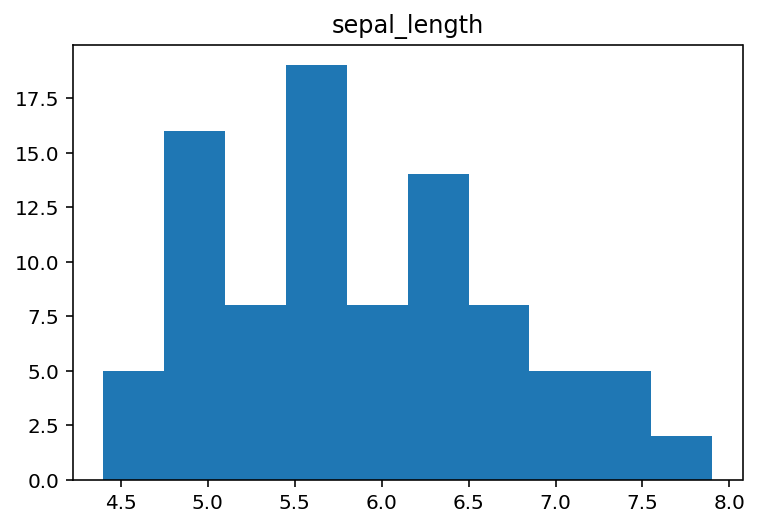

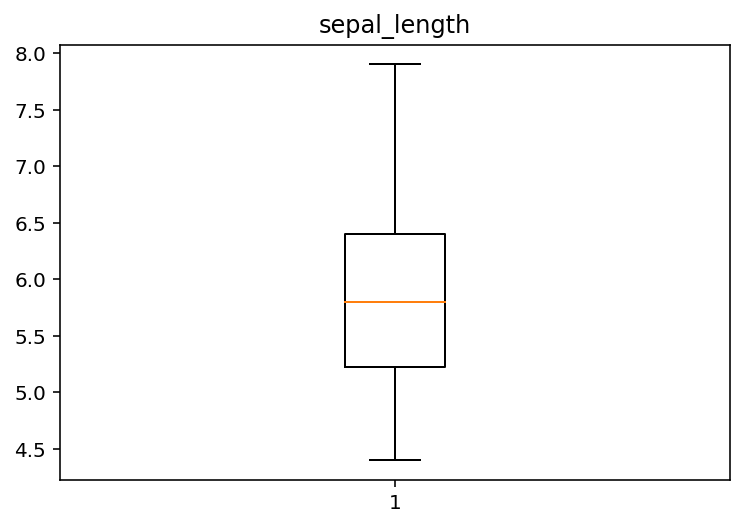

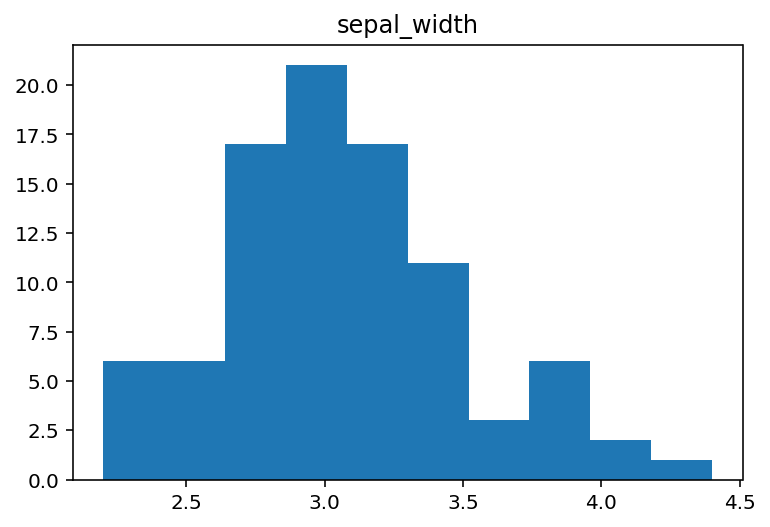

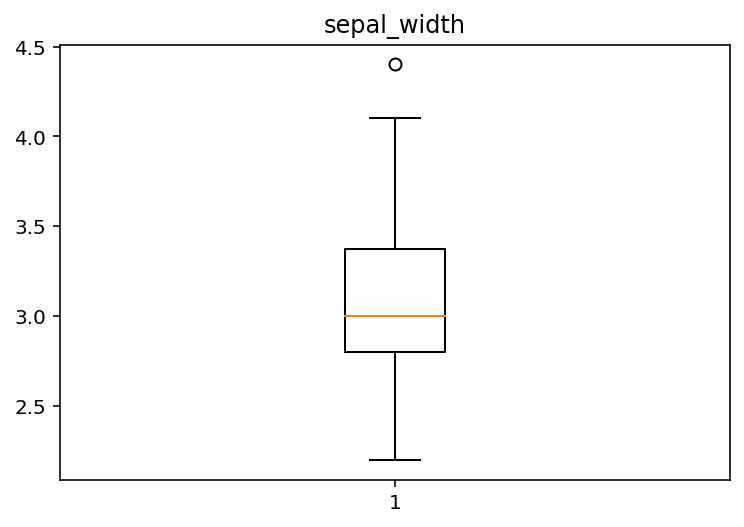

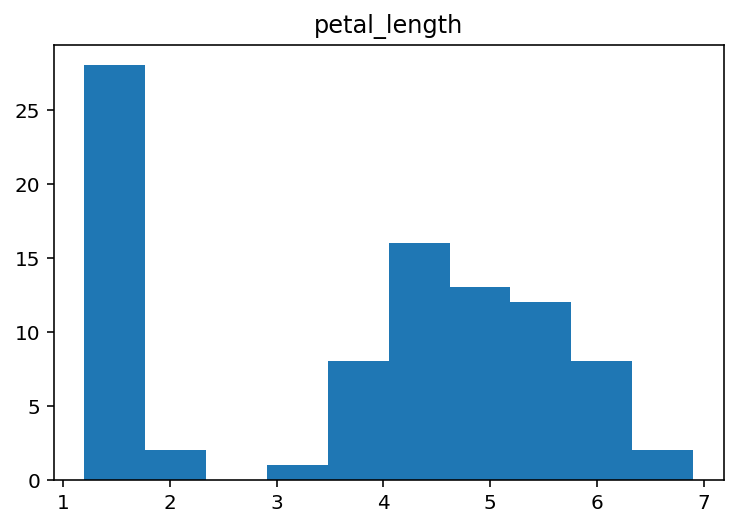

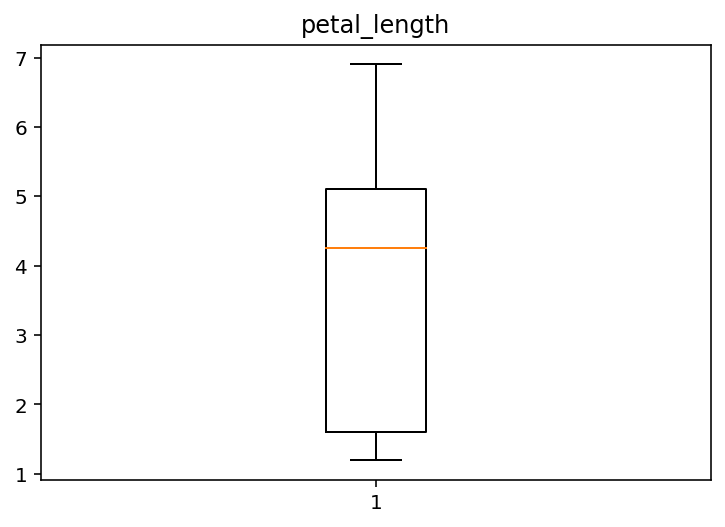

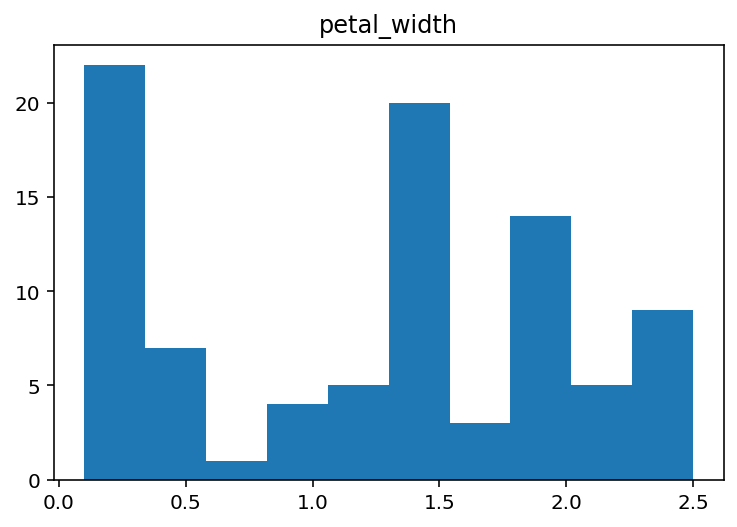

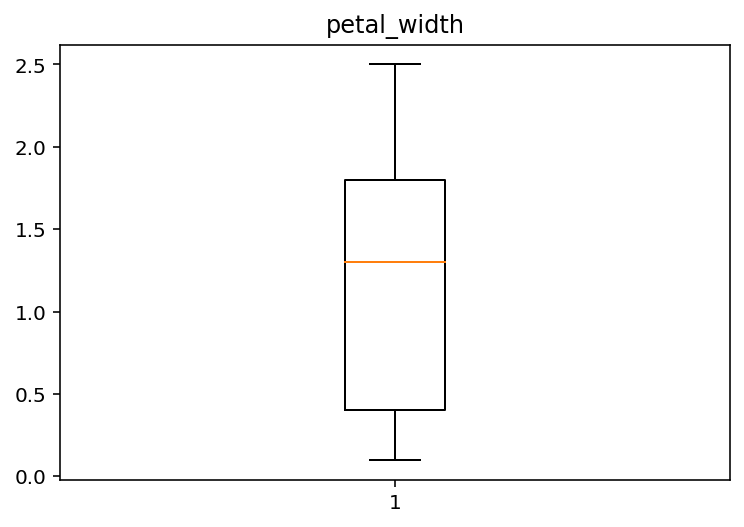

In [112]:
# Plot numeric columns
plot_float_cols = float_cols 
for col in plot_float_cols:
    plt.hist(train_iris[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train_iris[col])
    plt.title(col)
    plt.show()
    
# float_cols function REPLACES:
# train_iris.columns[[train_iris[col].dtype == 'float64' for col in train_iris.columns

### 1.2 For each species (categorical variable): create a frequency table and a bar plot of those frequencies. 

In [113]:
train_iris.species_name.value_counts()

versicolor    30
virginica     30
setosa        30
Name: species_name, dtype: int64

(array([30.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0., 30.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

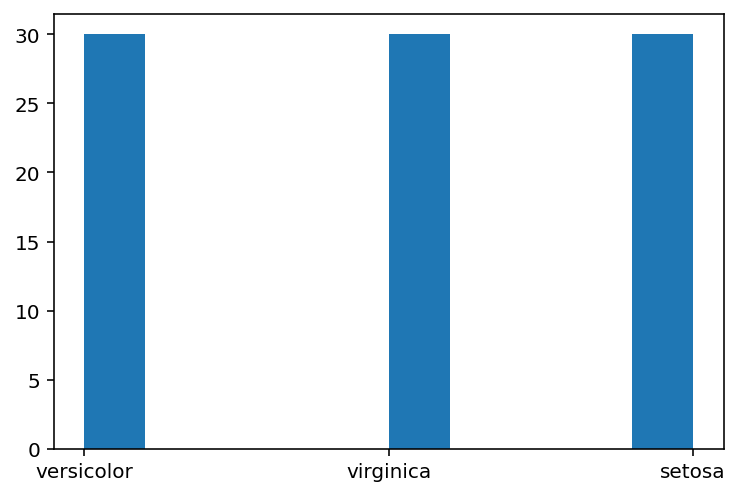

In [114]:
plt.hist(train_iris.species_name)

### 1.3 Document takeaways & any actions. 

<div class="alert alert-info">
<b>DOCUMENT NOTES</b>

<b>Sepal Length & Width</b> are NOT significantly different and are not prime candidates for predictive analysis.  
<b>Petal Length & Width</b> are significantly different enough for reasonably acurate predictive analysis capable of singling out at least one of the three species with an extremely high rate of confidence while also distinct enough to make fairly competent predictions between the other two species with a moderate to low margin for error.
    
</div>

### 2. Bivariate Stats

### 2.1 Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

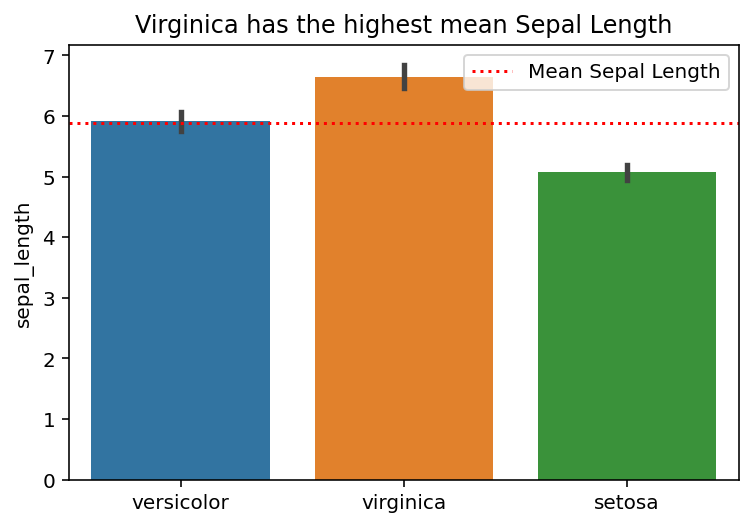

In [115]:
plt.title("Virginica has the highest mean Sepal Length")
sns.barplot(x="species_name", y="sepal_length", data=train_iris)
mean_sepal_length = train_iris.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean Sepal Length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

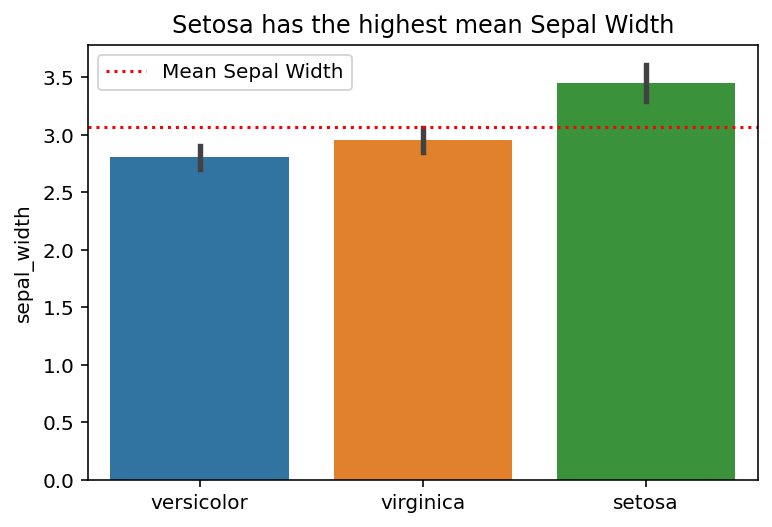

In [116]:
plt.title("Setosa has the highest mean Sepal Width")
sns.barplot(x="species_name", y="sepal_width", data=train_iris)
mean_sepal_width = train_iris.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean Sepal Width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

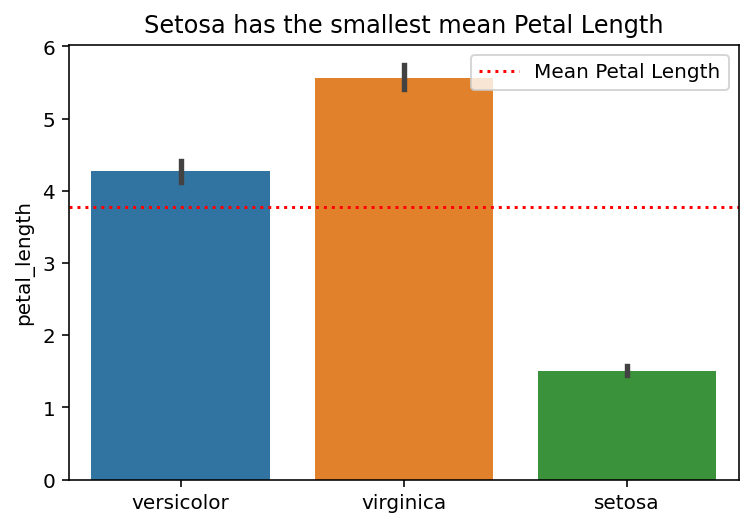

In [117]:
plt.title("Setosa has the smallest mean Petal Length")
sns.barplot(x="species_name", y="petal_length", data=train_iris)
mean_petal_length = train_iris.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean Petal Length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

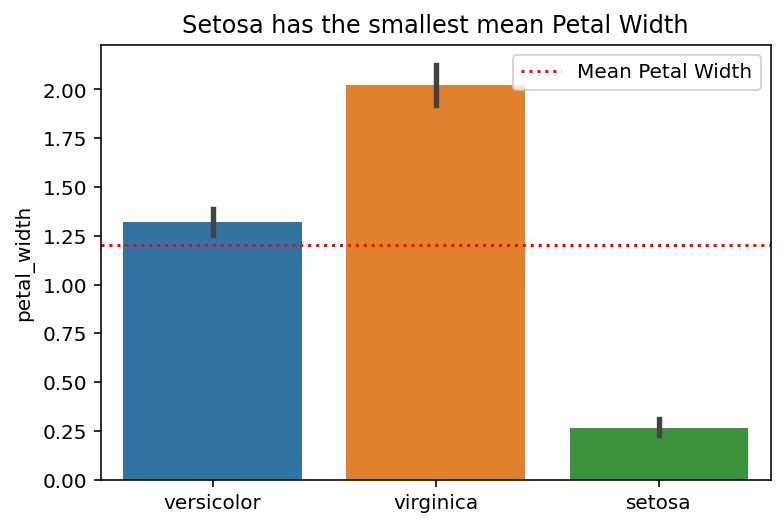

In [118]:
plt.title("Setosa has the smallest mean Petal Width")
sns.barplot(x="species_name", y="petal_width", data=train_iris)
mean_petal_width = train_iris.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean Petal Width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

### 2.2 For each measurement type, compute the descriptive statistics for each species. 

In [119]:
# Virginica descriptive statistics
versicolor_describe_sl = pd.DataFrame(train_iris[train_iris.species_name == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train_iris[train_iris.species_name == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train_iris[train_iris.species_name == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train_iris[train_iris.species_name == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,30.00000,30.000000,30.000000,30.000000
mean,5.91000,2.806667,4.273333,1.320000
std,0.47659,0.281539,0.409317,0.193694
min,4.90000,2.300000,3.300000,1.000000
25%,5.60000,2.625000,4.000000,1.200000
50%,5.80000,2.800000,4.250000,1.300000
75%,6.17500,3.000000,4.575000,1.475000
max,7.00000,3.400000,5.100000,1.800000


In [120]:
# Virginica descriptive statistics
virginica_describe_sl = pd.DataFrame(train_iris[train_iris.species_name == 'virginica'].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train_iris[train_iris.species_name == 'virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train_iris[train_iris.species_name == 'virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train_iris[train_iris.species_name == 'virginica'].petal_width.describe())

virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,6.646667,2.956667,5.563333,2.023333
std,0.533520,0.309263,0.492344,0.286095
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.125000,1.800000
50%,6.500000,3.000000,5.550000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [121]:
# Virginica descriptive statistics
setosa_describe_sl = pd.DataFrame(train_iris[train_iris.species_name == 'virginica'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train_iris[train_iris.species_name == 'virginica'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train_iris[train_iris.species_name == 'virginica'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train_iris[train_iris.species_name == 'virginica'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,6.646667,2.956667,5.563333,2.023333
std,0.533520,0.309263,0.492344,0.286095
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.125000,1.800000
50%,6.500000,3.000000,5.550000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


### 2.3 For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types. 

In [122]:
virginica = train_iris[train_iris.species_name == 'virginica']
versicolor = train_iris[train_iris.species_name == 'versicolor']
setosa = train_iris[train_iris.species_name == 'setosa']

t_stat, p_val = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="two-sided")
t_stat, p_val

(883.0, 1.274471779403707e-10)

In [123]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t_stat, p_val = t_stat, p_val = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="two-sided")
    print(f'Comparing {var} between Virginica and Versicolor')
    print(t_stat, p_val)
    print('')
    print('---------------------------------------------------------------------')
    print('')

Comparing sepal_length between Virginica and Versicolor
767.0 2.7482419419191076e-06

---------------------------------------------------------------------

Comparing sepal_width between Virginica and Versicolor
575.0 0.06370930409956933

---------------------------------------------------------------------

Comparing petal_length between Virginica and Versicolor
892.5 6.02995793051305e-11

---------------------------------------------------------------------

Comparing petal_width between Virginica and Versicolor
883.0 1.274471779403707e-10

---------------------------------------------------------------------



### 2.4 Document takeaways & any actions.

# WORDS GO HERE
- petal_length and petal_width show the most seperation between species.
- Could petal and sepal area be useful features? 
- viginica iris have the largest petals. 
- setosa iris have the smallest petals. 
- setosa seem to have wide & short sepals. 

### 3. Multivariate Stats

### 3.1 Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [124]:
train_iris['sepal_area'] = train_iris.sepal_length * train_iris.sepal_width
train_iris['petal_area'] = train_iris.petal_length * train_iris.petal_width

In [125]:
train_iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
70,2,versicolor,5.9,3.2,4.8,1.8,18.88,8.64
123,3,virginica,6.3,2.7,4.9,1.8,17.01,8.82
87,2,versicolor,6.3,2.3,4.4,1.3,14.49,5.72
3,1,setosa,4.6,3.1,1.5,0.2,14.26,0.30
15,1,setosa,5.7,4.4,1.5,0.4,25.08,0.60


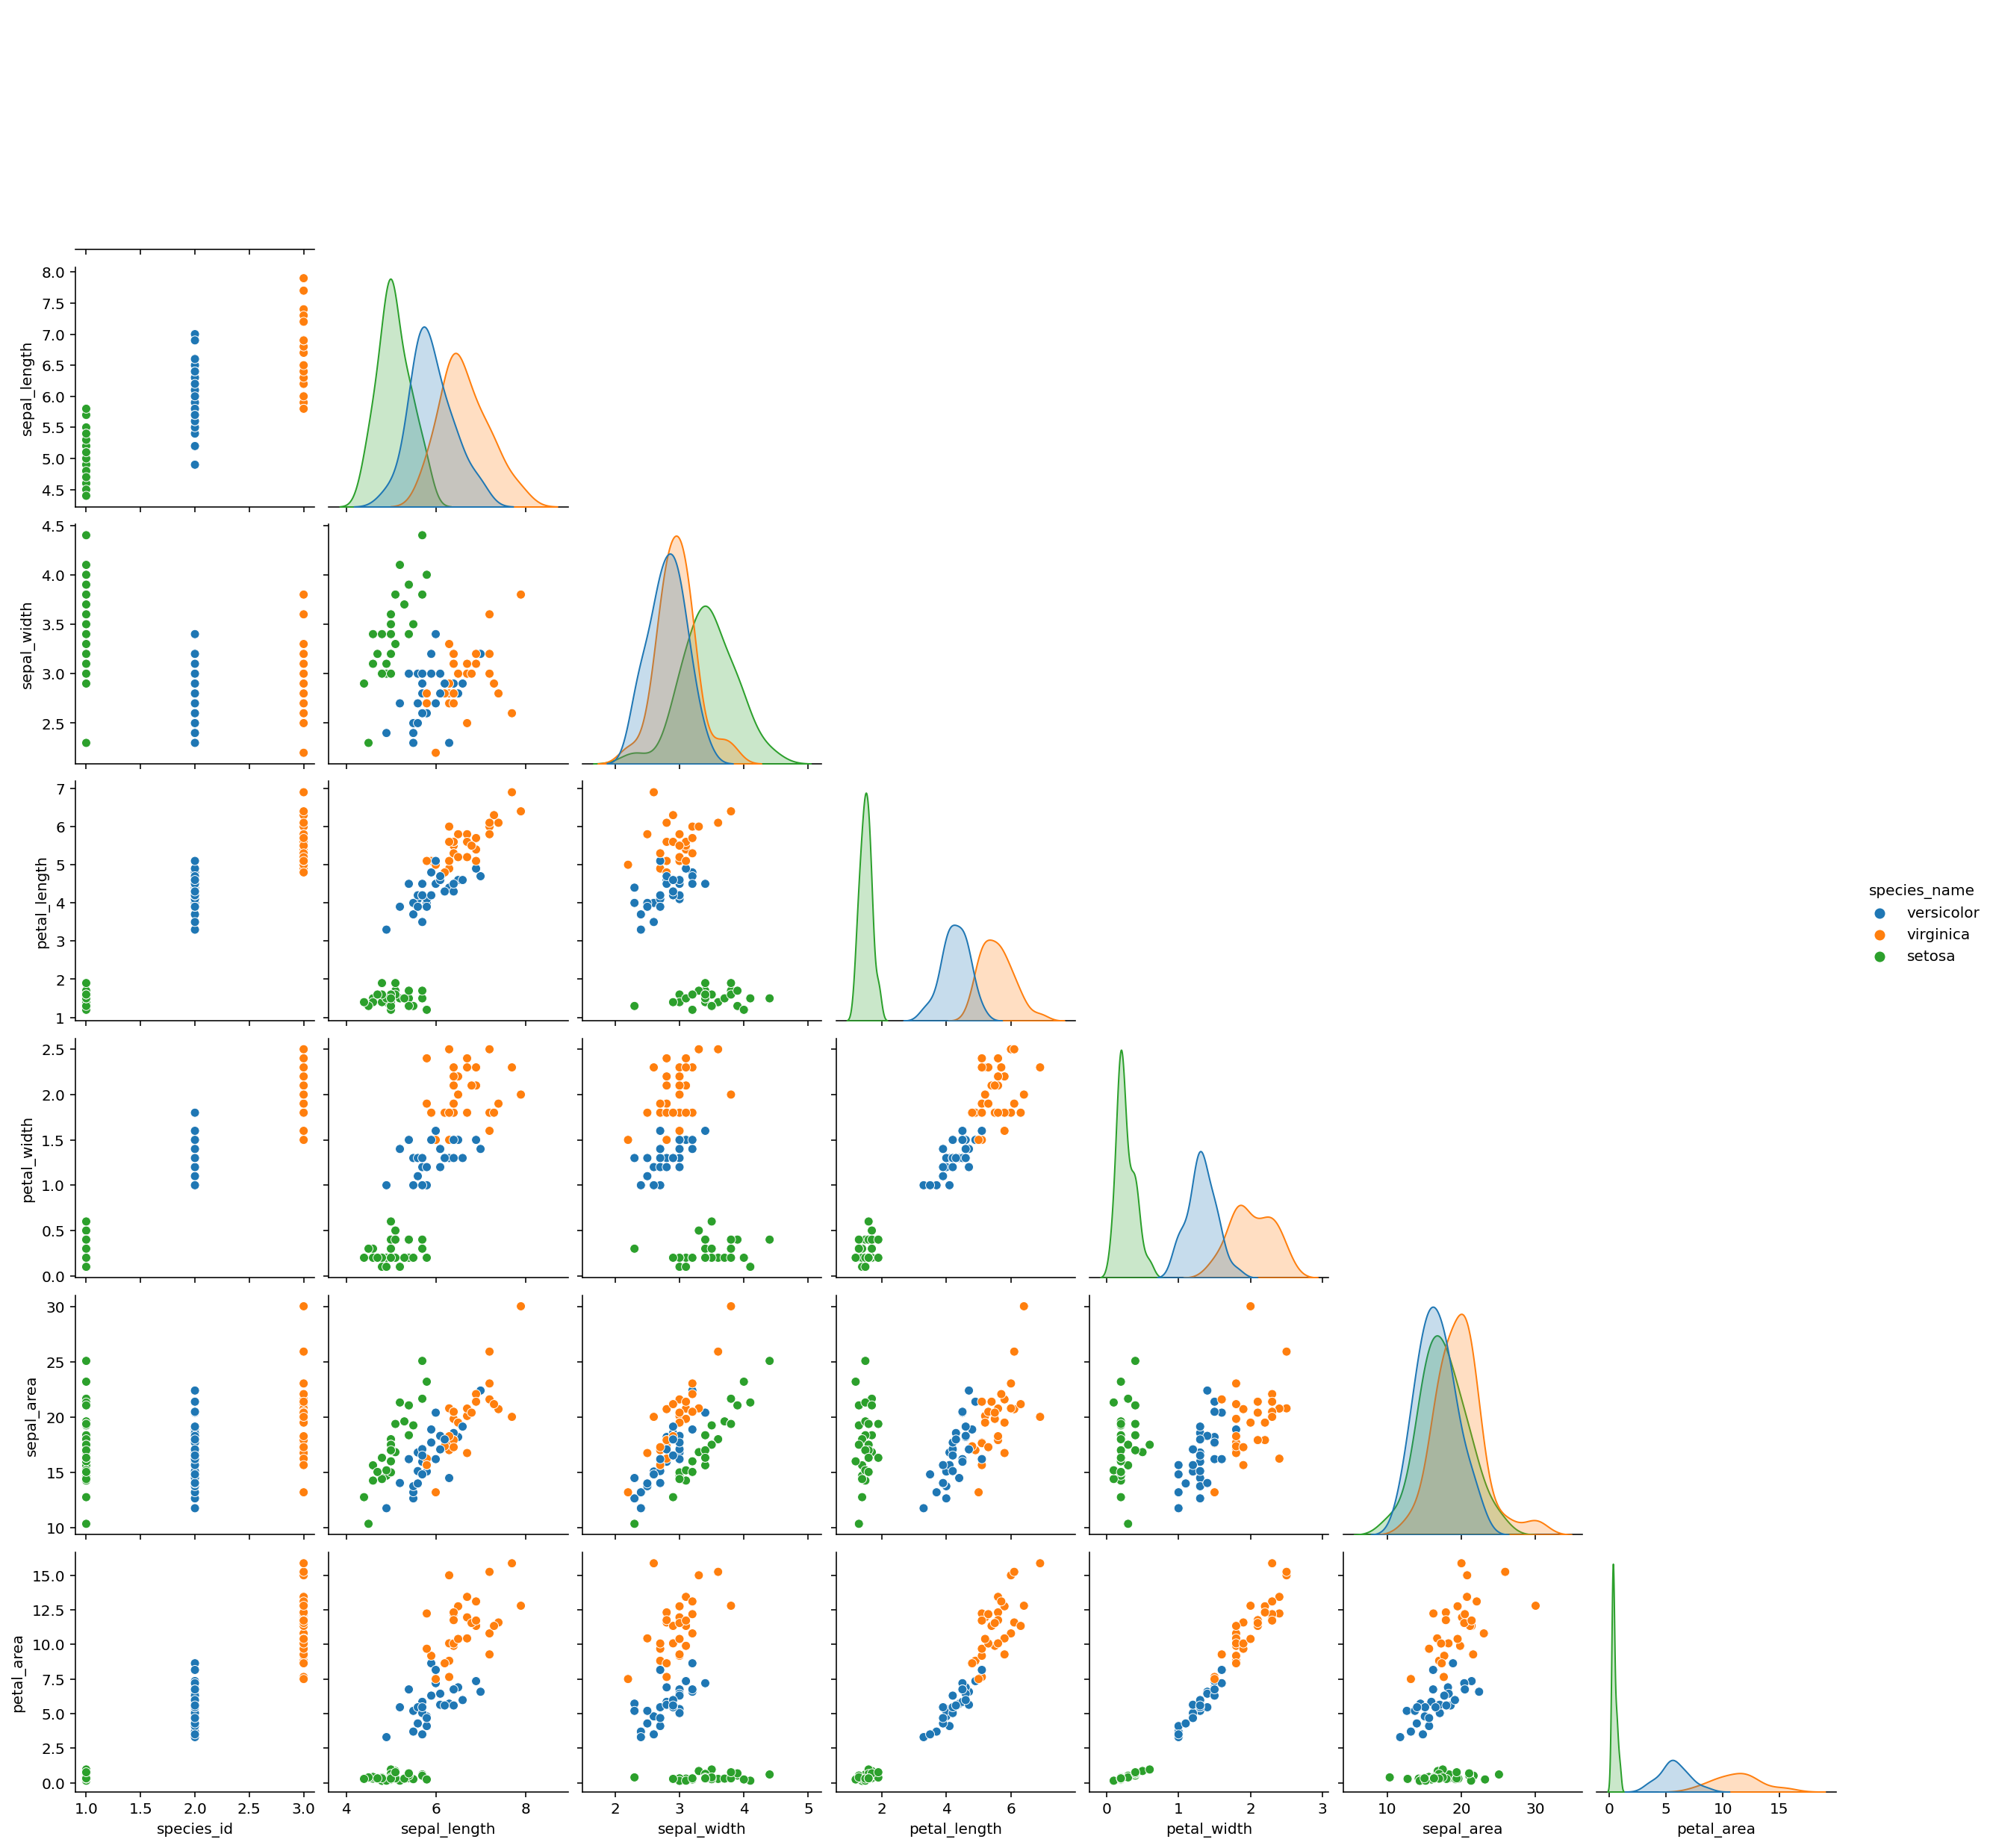

In [126]:
sns.pairplot(train_iris, hue='species_name', corner=True)
plt.show()

In [127]:
train_iris.groupby('species_name')['sepal_area'].sum()

species_name
setosa        527.53
versicolor    499.53
virginica     591.68
Name: sepal_area, dtype: float64

In [128]:
train_iris.groupby('species_name')['petal_area'].sum()

species_name
setosa         12.24
versicolor    170.96
virginica     338.70
Name: petal_area, dtype: float64

In [129]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length'),
    ('sepal_width', 'petal_width'),
    ('sepal_length', 'petal_width'),
    ('sepal_width', 'petal_length')
]

In [130]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species_name, subset in train_iris.groupby('species_name'):
        plt.scatter(subset[x], subset[y], label=species_name)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

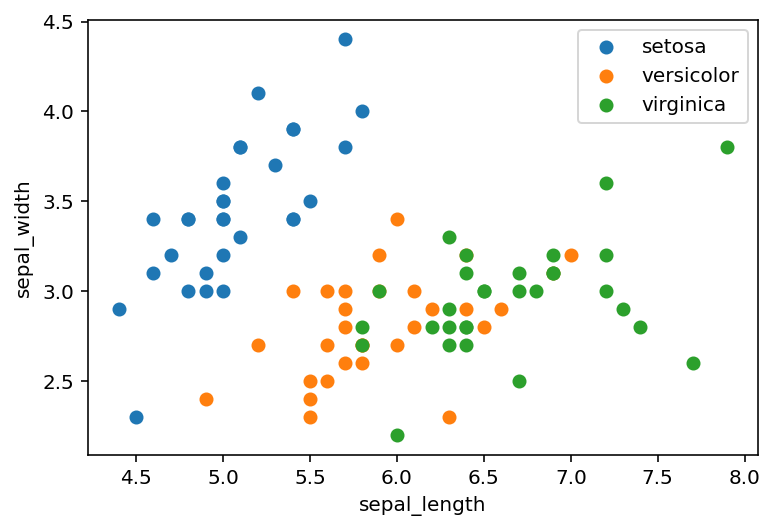

In [131]:
scatter_species(x, y)

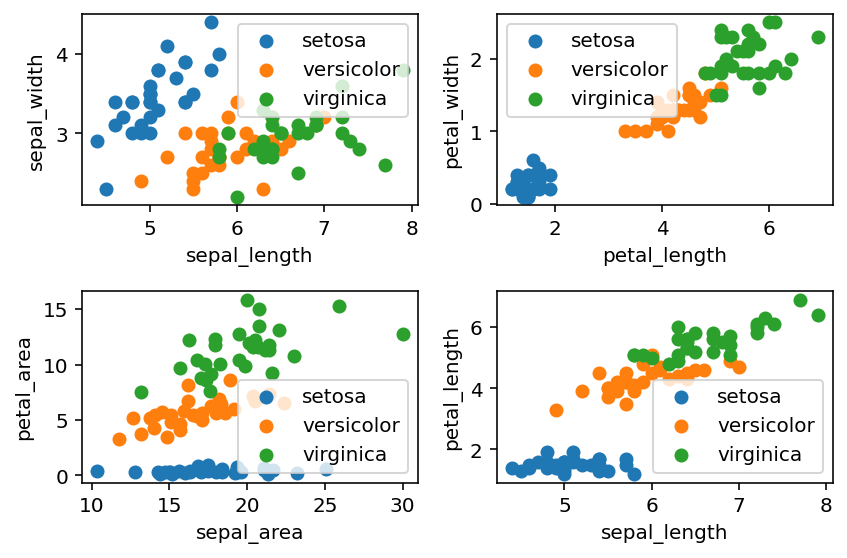

In [132]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

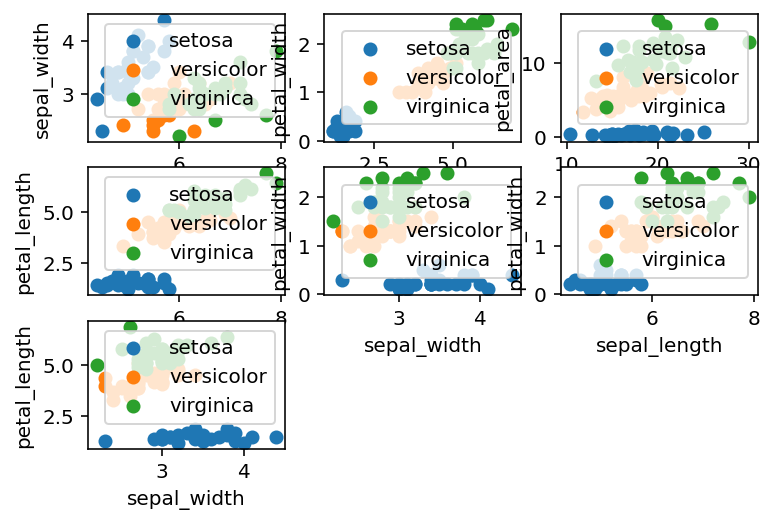

In [133]:
for i, pair in enumerate(combos):
    plt.subplot(3,3,i+1)
    scatter_species(pair[0], pair[1])

### 3.2 Visualize two numeric variables by means of the species. Hint: `sns.relplot` with `hue` or `col`

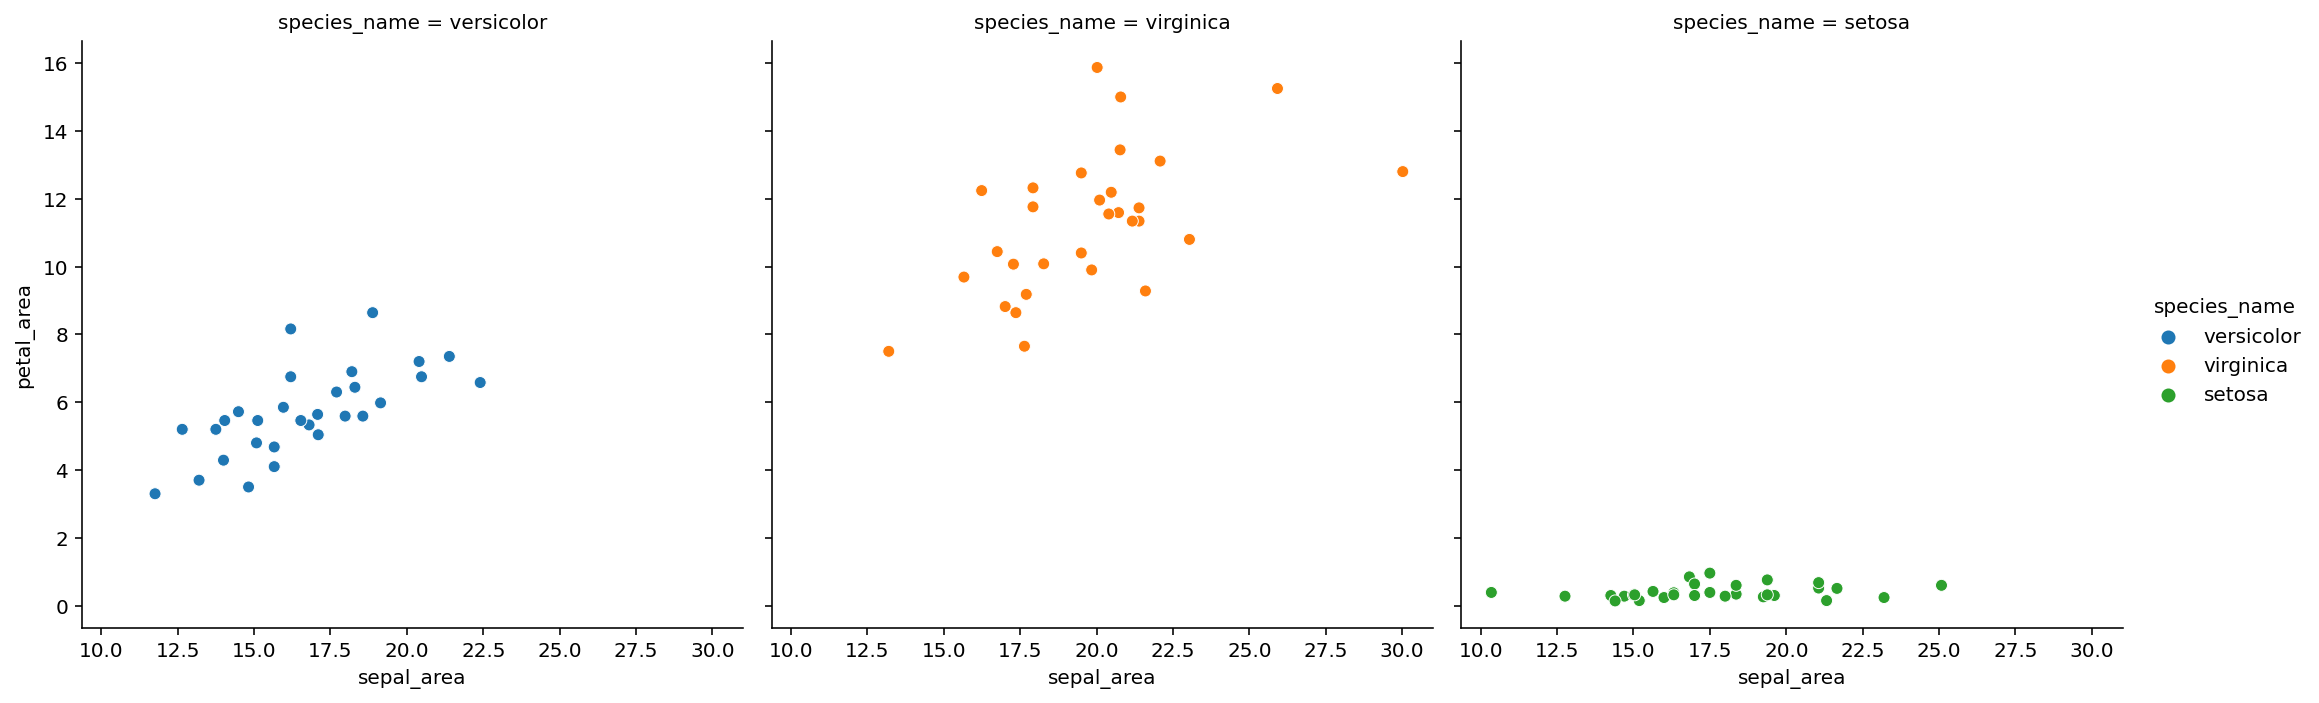

In [134]:
sns.relplot(data=train_iris, x='sepal_area', y='petal_area', kind='scatter', hue='species_name', col='species_name')

### 3.3 Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

<AxesSubplot:xlabel='species_name', ylabel='sepal_length'>

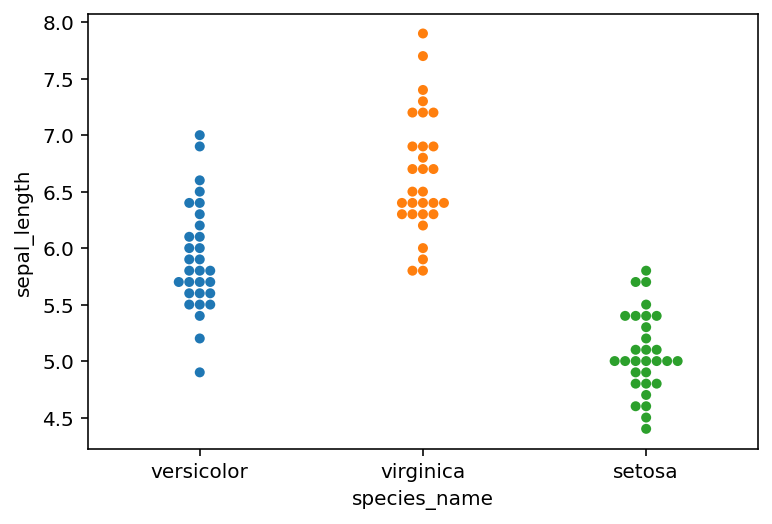

In [135]:
sns.swarmplot(data=train_iris, x='species_name', y='sepal_length')

In [136]:
train_iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
70,2,versicolor,5.9,3.2,4.8,1.8,18.88,8.64
123,3,virginica,6.3,2.7,4.9,1.8,17.01,8.82
87,2,versicolor,6.3,2.3,4.4,1.3,14.49,5.72
3,1,setosa,4.6,3.1,1.5,0.2,14.26,0.30
15,1,setosa,5.7,4.4,1.5,0.4,25.08,0.60


In [137]:
train_melt = train_iris.melt(id_vars = 'species_name')

In [138]:
train_melt.head()

,species_name,variable,value
0,versicolor,species_id,2.0
1,virginica,species_id,3.0
2,versicolor,species_id,2.0
3,setosa,species_id,1.0
4,setosa,species_id,1.0


<AxesSubplot:xlabel='variable', ylabel='value'>

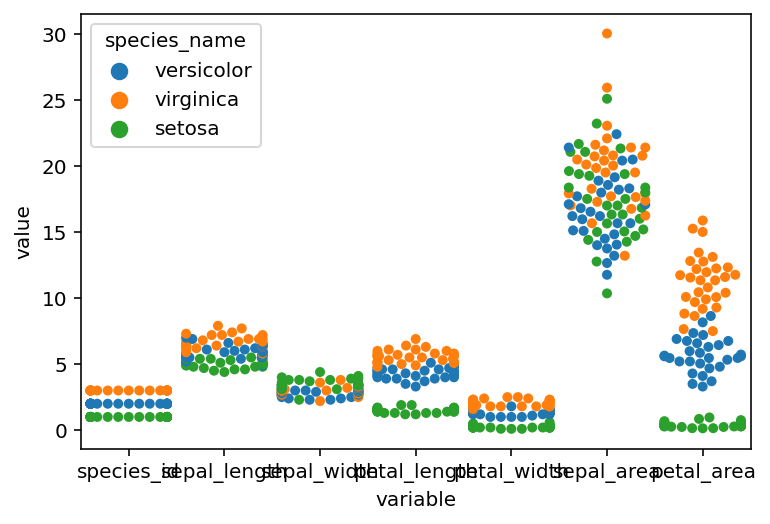

In [139]:
sns.swarmplot(data=train_melt, x='variable', y='value', hue='species_name')

### 3.4 Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance). 

In [140]:
train_iris.corr()

,species_id,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
species_id,1.000000,0.816979,-0.461239,0.955183,0.954663,0.271471,0.954325
sepal_length,0.816979,1.000000,-0.152049,0.868360,0.819404,0.644615,0.855679
sepal_width,-0.461239,-0.152049,1.000000,-0.470085,-0.401092,0.651928,-0.341278
petal_length,0.955183,0.868360,-0.470085,1.000000,0.958664,0.303880,0.955387
petal_width,0.954663,0.819404,-0.401092,0.958664,1.000000,0.322785,0.981809
sepal_area,0.271471,0.644615,0.651928,0.303880,0.322785,1.000000,0.394489
petal_area,0.954325,0.855679,-0.341278,0.955387,0.981809,0.394489,1.000000


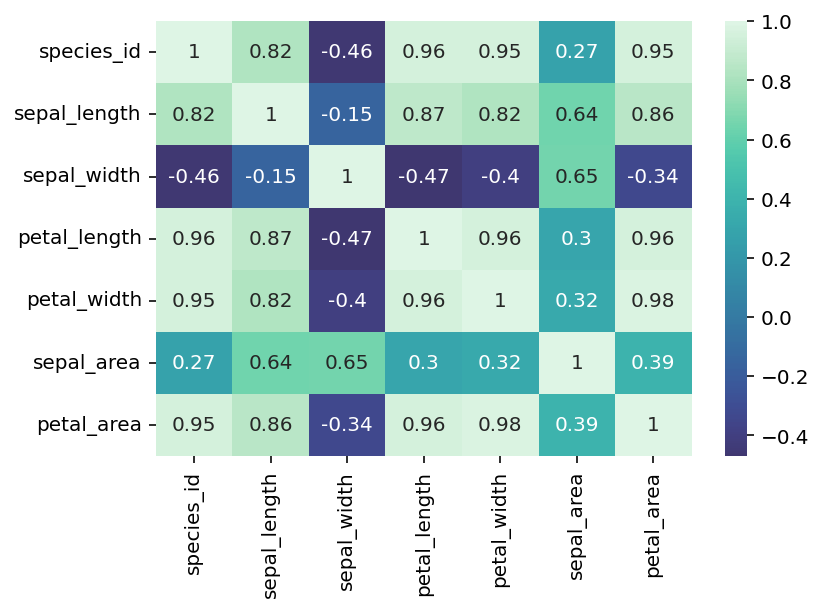

In [141]:
sns.heatmap(train_iris.corr(), cmap='mako', center=0, annot=True)
plt.show()

**Takeaways**

- most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.  

- Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

- Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

- Little to no **LINEAR** correlation: sepal length & sepal width. 

A scatter matrix visualizing the interaction of each variable.

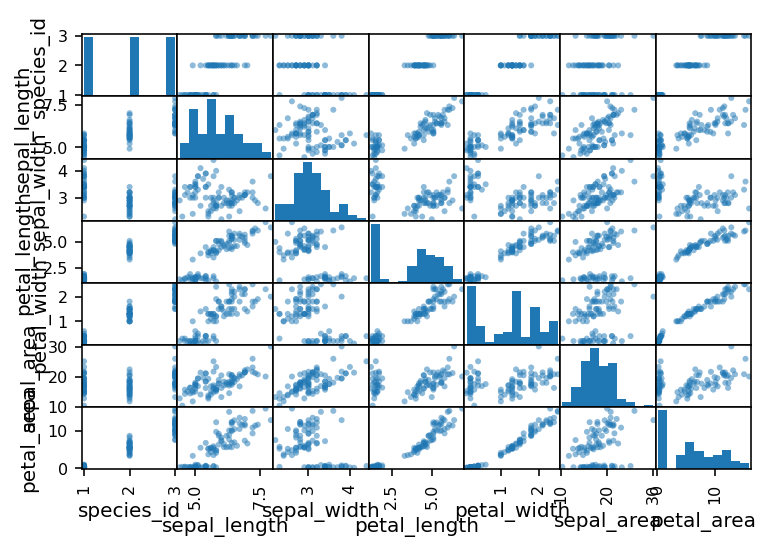

In [142]:
pd.plotting.scatter_matrix(train_iris)
plt.show()

In [143]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 70 to 97
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    90 non-null     int64  
 1   species_name  90 non-null     object 
 2   sepal_length  90 non-null     float64
 3   sepal_width   90 non-null     float64
 4   petal_length  90 non-null     float64
 5   petal_width   90 non-null     float64
 6   sepal_area    90 non-null     float64
 7   petal_area    90 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.4+ KB


**Takeaways** 

- petal length + petal width show the most seperation between species.
- setosa has the shortest and narrowest petals. It will be the easiest to determine. 
- petal area seems to show the largest separation between virginica & versicolor of all the individual features. 
- virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say. 
- virginica and versicolor show little to no difference when it comes to the width of the sepals. 

**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **two_tail (verginica, versicolor)**  


* One Sample or Two Samples?\
 **two_sample (verginica, versicolor)**  


* Continuous or Discreat?\
 **Continuous (verginica) vs Continuous (versicolor) = Pearson's R**  
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\  
 **$H_{0}$: Verginica Sepal length is NOT ```different``` than Versicolor Sepal length**\  
 ```train_iris.verginica.sepal_length.mean``` == ```train_iris.versicolor.sepal_length.mean```


* $𝐻_𝑎$: What am I trying to prove\  
 **$H_{a}$: Verginica Sepal length is significantly ```different``` than Versicolor Sepal length**\  
 ```train_iris.verginica.sepal_length.mean``` != ```train_iris.versicolor.sepal_length.mean```

In [144]:
virginica = train_iris[train_iris['species_name'] == 'virginica']
versicolor = train_iris[train_iris['species_name'] == 'versicolor']

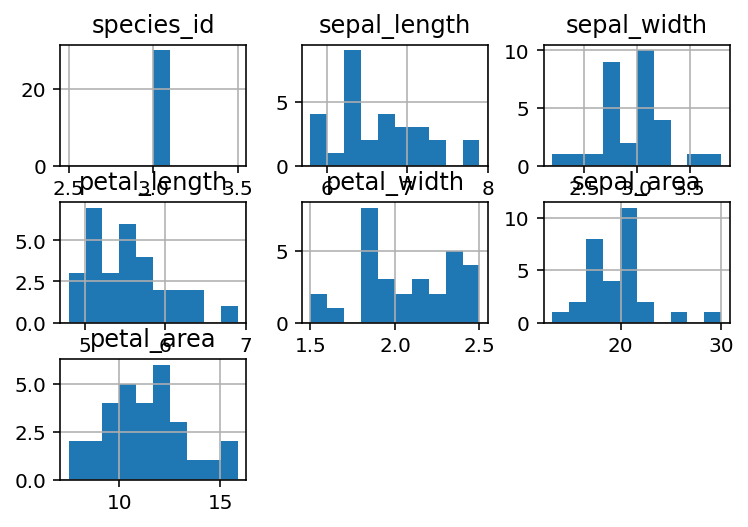

In [145]:
virginica.hist()
plt.show()

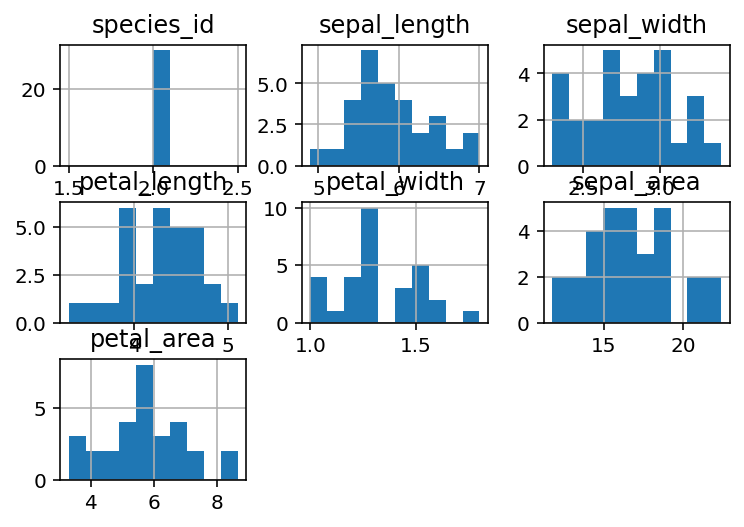

In [146]:
versicolor.hist()
plt.show()

In [147]:
virginica.describe()['sepal_length']['std']

0.5335200822470693

In [148]:
versicolor.describe()['sepal_length']['std']

0.47658989816663416

In [149]:
virginica.describe()['sepal_length']

count    30.000000
mean      6.646667
std       0.533520
min       5.800000
25%       6.300000
50%       6.500000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64

In [150]:
versicolor.describe()['sepal_length']

count    30.00000
mean      5.91000
std       0.47659
min       4.90000
25%       5.60000
50%       5.80000
75%       6.17500
max       7.00000
Name: sepal_length, dtype: float64

In [151]:
t_stat, p_val = stats.ttest_ind(virginica.sepal_length,
                                versicolor.sepal_length, 
                                equal_var=False)

In [152]:
t_stat, p_val

(5.640132524197554, 5.47448246054687e-07)

### 3.5 Document takeaways and any actions.

**Conclusion** 

- We reject $H_0$ that the sepal length is the same for both groups.

**Takeaway**

- Sepal length will be a useful feature. 

What about sepal_width? Let's use the Mann-Whitney test for demo purposes. 

**Hypothesis**

- alpha = .05
for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.


- $H_0$: For randomly selected values of sepal width, the probability of sepal width for virginica being greater than the sepal width for versicolor is equal to the probability of sepal width for versicolor being greater than the sepal width for virginica.

        p(virginica > versicolor) == p(versicolor > virginica)

- $H_a$: The probability of randomly selected values being larger than each other by class is not equal. $\mu_{virginica} != \mu_{versicolor}$. 

In [153]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width)

MannwhitneyuResult(statistic=575.0, pvalue=0.06370930409956933)

**Conclusion**

We reject $H_0$ that the sepal width is the same! 

**Takeaway**

Sepal width, while not the strongest indicator, is still useful. 

<div class="alert alert-block alert-warning">
Planning - Acquisition - Preparation - <font color='red'><b>Exploratory Analysis</b></font> - Modeling - Product Delivery
</div>

# Exploratory Data Analysis Exercises

### Part II

Explore your `titanic` dataset more completely.

- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

<div class="alert alert-block alert-warning">
Planning - Acquisition - Preparation - <font color='red'><b>Exploratory Analysis</b></font> - Modeling - Product Delivery
</div>

# Exploratory Data Analysis Exercises

### Part III

- Explore your `telco` data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.